In [8]:
from nlp_ood_detection.benchmarks.generate_score import generate_scores
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

datasets = [("imdb", "sst2") ,
            ("imdb", "trec"), 
            ("imdb","imdb"),
            ("imdb", "race"),
            ("imdb", "yelp_review_full"),
            ("imdb", "paws")
            ]
data_folder = "/home/betelgeuse/Desktop/3A/NLP/nlp_ood_detection/data"
aggregations = ["mean"]
model_name = "textattack/distilbert-base-uncased-imdb"
methods = ["aiirw", "msp", "energy", "maha"]
metrics, scores = generate_scores(
    datasets=datasets,
    aggregations=aggregations,
    data_folder=data_folder,
    methods=methods,
    model_name=model_name,
    dataset_in="sst2",
    use_autoencoder=False,
)


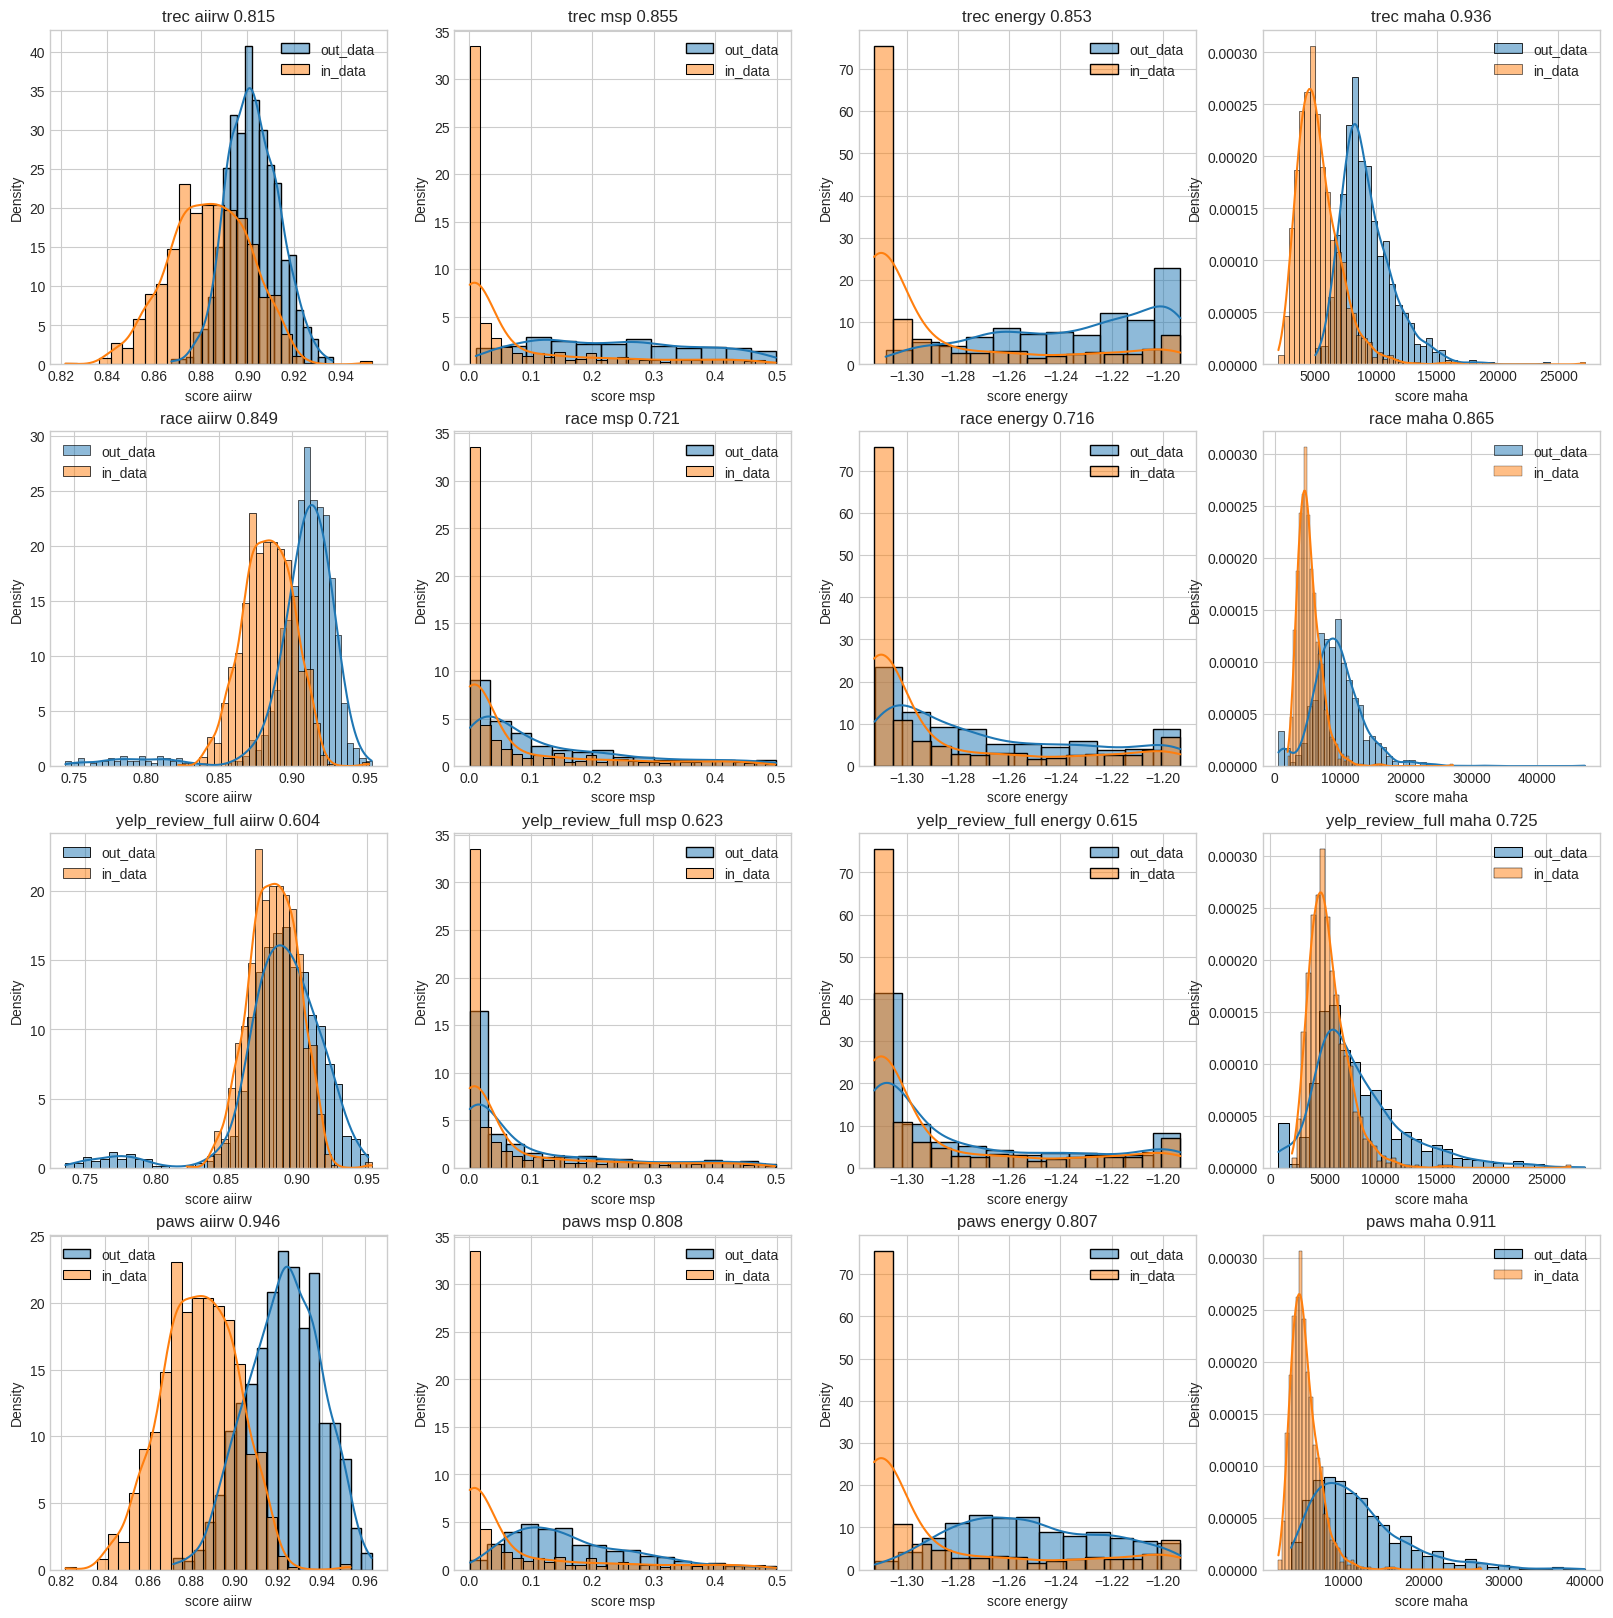

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

out_datasets = ["trec","race", "yelp_review_full", "paws"]
aggregation = "mean"
fig, ax = plt.subplots(len(out_datasets), len(methods), figsize=(20, 20))
idx = 0
sns.axes_style("whitegrid")
for out_dataset in out_datasets:
    for method in methods:
        curr_ax = ax[idx // len(methods)][idx % len(methods)]
        sns.histplot(scores["imdb"][out_dataset][method][aggregation], kde=True, stat="density", label="out_data",ax=curr_ax)
        sns.histplot(scores["imdb"]["sst2"][method][aggregation], kde=True, stat="density", label="in_data", ax=curr_ax)
        curr_ax.set_title(f"{out_dataset} {method} {metrics['imdb'][out_dataset][method][aggregation]['auc_roc']:.3f}")
        curr_ax.legend()
        curr_ax.set_xlabel(f"score {method}")
        idx += 1
plt.show()

/tmp/ipykernel_41881/1592553441.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


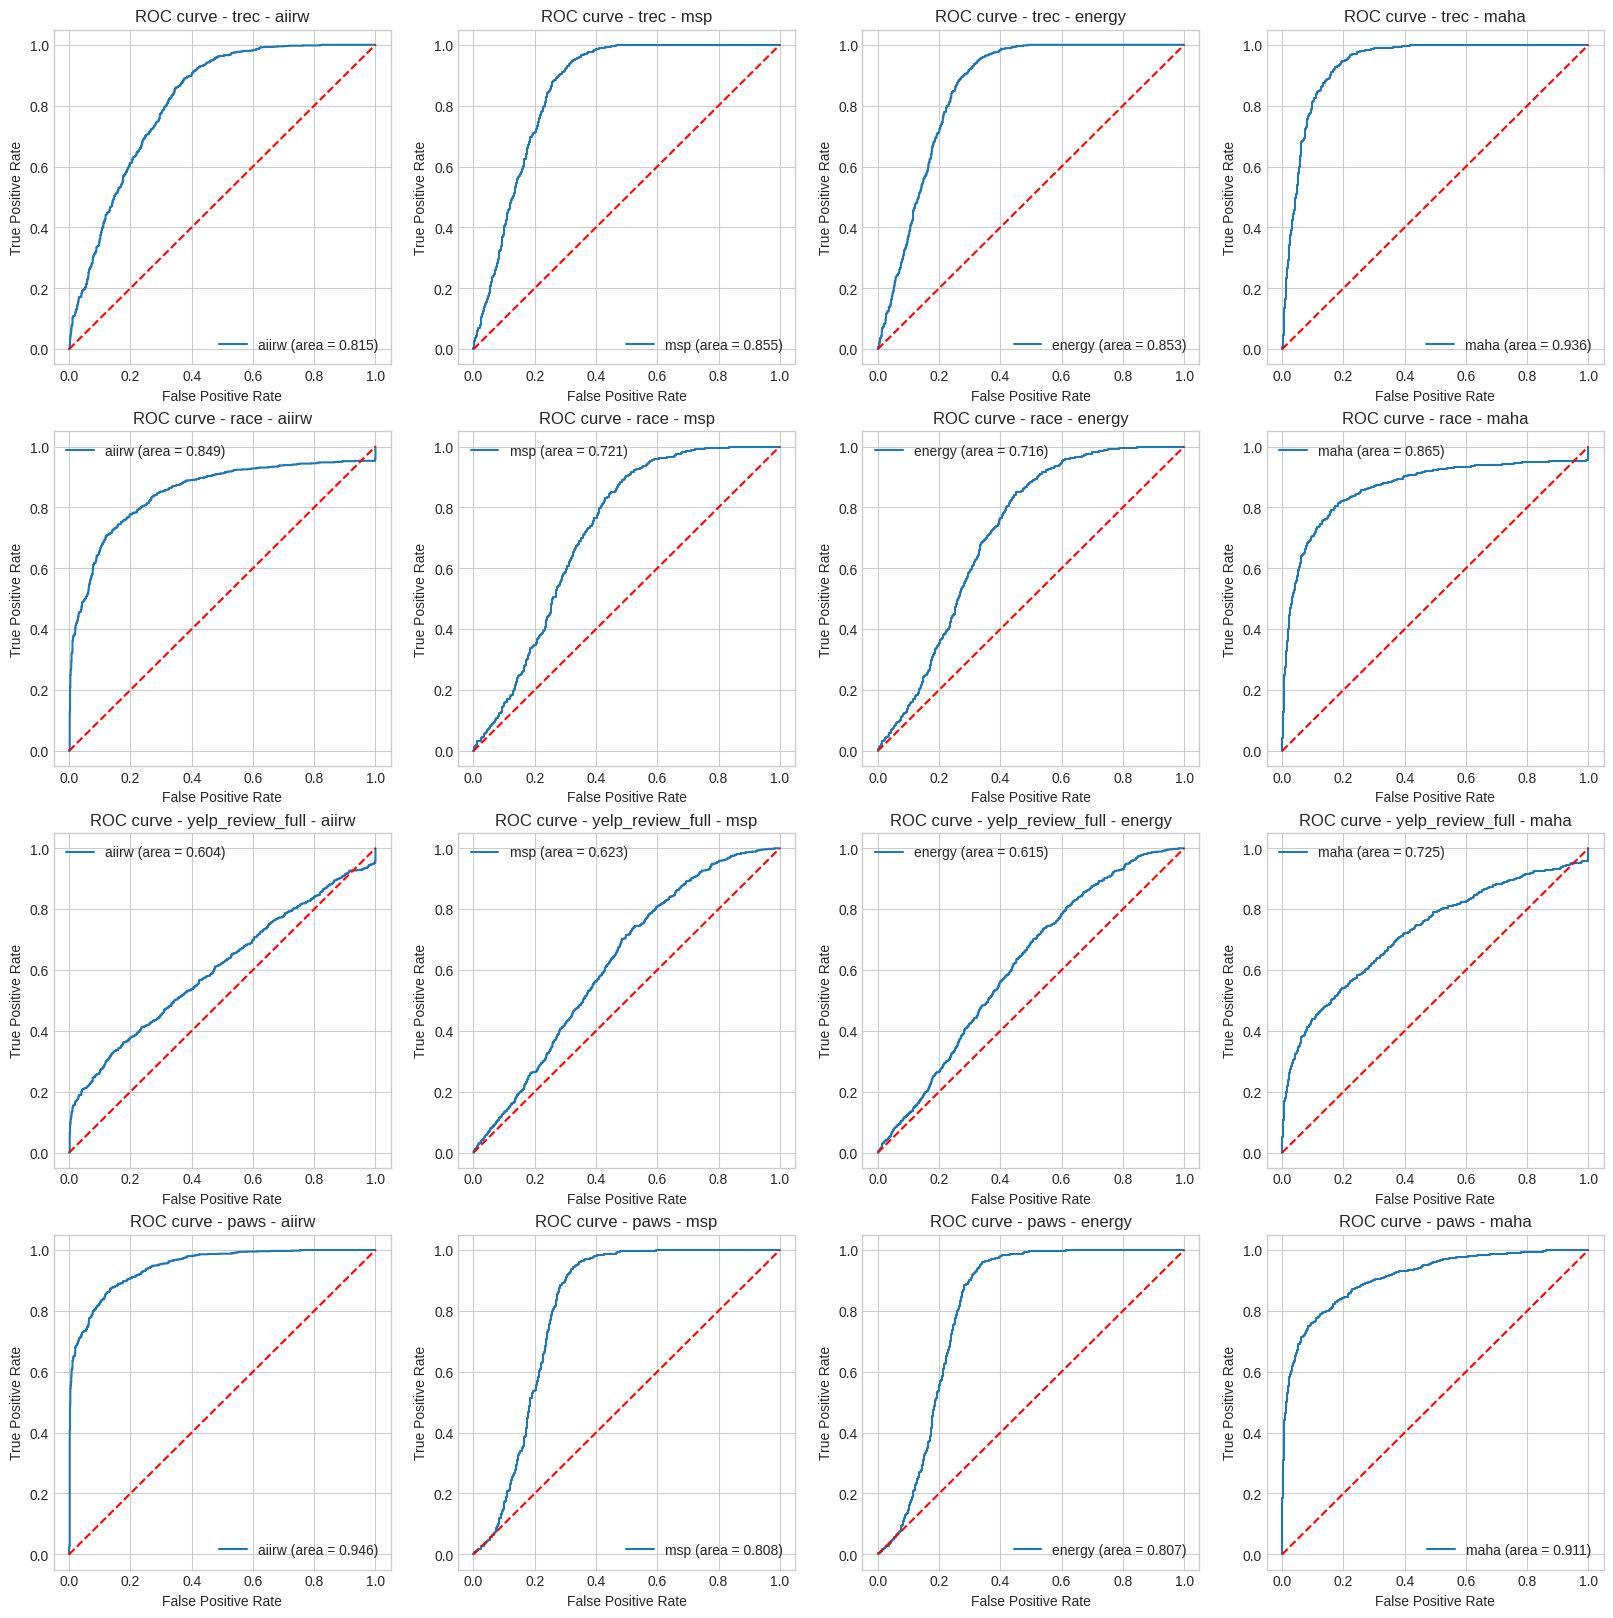

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(fpr, tpr, roc_auc, method, dataset_out, ax):
    ax.plot(fpr, tpr, label=f"{method} (area = {roc_auc:.3f})")
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC curve - {dataset_out} - {method}")
    ax.legend(loc="lower right")

out_datasets = ["trec","race", "yelp_review_full", "paws"]
aggregation = "mean"
fig, ax = plt.subplots(len(out_datasets), len(methods), figsize=(20, 20))
idx = 0
plt.style.use("seaborn-whitegrid")
for out_dataset in out_datasets:
    for method in methods:
        curr_ax = ax[idx // len(methods)][idx % len(methods)]
        plot_roc_curve(metrics["imdb"][out_dataset][method][aggregation]["fpr"], metrics["imdb"][out_dataset][method][aggregation]["tpr"], metrics["imdb"][out_dataset][method][aggregation]["auc_roc"], method, out_dataset, curr_ax)
        curr_ax.legend()
        idx += 1
plt.show()


In [11]:
import pandas as pd
df = {
    "roc_auc": [],
}

out_datasets = ["trec","race", "yelp_review_full", "paws"]
aggregation = "mean"
columns = ["roc_auc"]
index = []
for out_dataset in out_datasets:
    for method in methods:
        df["roc_auc"].append(metrics["imdb"][out_dataset][method][aggregation]["auc_roc"])
        index.append(f"{out_dataset} {method}")
df = pd.DataFrame(df, index=index, columns=columns)
df.to_latex("results.tex")

/tmp/ipykernel_41881/2635765340.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("results_autoencoder.tex")
